# Getting started with prenspire

In [1]:
import random
from pathlib import Path
from clophfit.prenspire import prenspire

%load_ext autoreload
%autoreload 2
tpath = Path("../../tests/EnSpire")

In [2]:
ef1 = prenspire.EnspireFile(tpath / "h148g-spettroC.csv")
ef2 = prenspire.EnspireFile(tpath / "e2-T-without_sample_column.csv")
ef3 = prenspire.EnspireFile(tpath / "24well_clop0_95.csv")

In [3]:
ef3._platemap

[['A', '  ', '  ', '- ', '- ', '- ', '- '],
 ['B', '- ', '- ', '  ', '  ', '  ', '  '],
 ['C', '- ', '- ', '- ', '  ', '  ', '  '],
 ['D', '  ', '  ', '  ', '  ', '  ', '  ']]

In [4]:
ef3.extract_measurements()
ef3.wells, ef3._well_list_platemap

(['A03', 'A04', 'A05', 'A06', 'B01', 'B02', 'C01', 'C02', 'C03'],
 ['A03', 'A04', 'A05', 'A06', 'B01', 'B02', 'C01', 'C02', 'C03'])

In [5]:
ef1.__dict__.keys()

dict_keys(['_ini', '_fin', '_data_list', '_metadata_post', '_well_list_platemap', '_platemap', 'metadata', '_filename'])

In [6]:
ef1.extract_measurements()
ef1.__dict__.keys()

dict_keys(['_ini', '_fin', '_data_list', '_metadata_post', '_well_list_platemap', '_platemap', 'metadata', '_filename', 'measurements', 'wells'])

In [7]:
ef2.extract_measurements()
ef2.wells

['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07']

In [8]:
ef1.measurements.keys(), ef2.measurements.keys()

(dict_keys(['A']), dict_keys(['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']))

when testing each spectra for the presence of a single wavelength in the appropriate monochromator

In [9]:
ef2.measurements["A"]["metadata"]

{'temp': '25',
 'Monochromator': 'Excitation',
 'Min wavelength': '400',
 'Max wavelength': '510',
 'Wavelength': '530',
 'Using of excitation filter': 'Top',
 'Measurement height': '8.9',
 'Number of flashes': '50',
 'Number of flashes integrated': '50',
 'Flash power': '100'}

In [10]:
ef2._data_list[0][::2]

['Well',
 'MeasB:WavelengthEms',
 'MeasA:WavelengthExc',
 'MeasA:Result',
 'MeasC:WavelengthEms',
 'MeasD:WavelengthExc',
 'MeasD:Result',
 'MeasE:WavelengthEms',
 'MeasF:WavelengthExc',
 'MeasF:Result',
 'MeasG:WavelengthEms',
 'MeasH:WavelengthExc',
 'MeasH:Result']

In [11]:
random.seed(11)
random.sample(ef1.measurements["A"]["F01"], 7)

[2163.0, 607.0, 1846.0, 517.0, 572.0, 2145.0, 2028.0]

In [12]:
en1 = prenspire.ExpNote(tpath / "h148g-spettroC-nota")

In [13]:
en1.wells[:7]

['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07']

In [14]:
en1.note_list[:5]

[['Well', 'pH', 'Chloride'],
 ['A01', '5.2', '0'],
 ['A02', '5.2', '6.7'],
 ['A03', '5.2', '13.3'],
 ['A04', '5.2', '26.7']]

In [15]:
en1.check_wells(ef1), en1.check_wells(ef2)

(True, False)

In [16]:
en1.build_titrations(ef1)

In [17]:
en1.__dict__.keys()

dict_keys(['note_list', 'wells', 'titrations', 'pH_values'])

In [18]:
en1.pH_values

['5.2', '6.3', '7.4', '8.1', '8.2']

In [19]:
tit0 = en1.titrations[0]
tit3 = en1.titrations[3]

In [20]:
tit0.__dict__.keys()

dict_keys(['conc', 'data', 'cl'])

In [21]:
tit0.conc, tit0.cl, tit3.conc, tit3.ph

([5.2, 6.3, 7.4, 8.1, 8.2],
 '0',
 [0.0, 6.7, 13.3, 26.7, 40.0, 60.0, 87.0, 120.0, 267.0, 400.0, 667.0],
 '7.4')

In [22]:
tit0.data["A"]

5.2     6.3      7.4      8.1       8.2
           A01     B01      C01      D01       E01
lambda                                            
272.0   3151.0  4181.0  16413.0  29192.0   28816.0
273.0   3130.0  4204.0  16926.0  29909.0   29545.0
274.0   3043.0  4232.0  17331.0  30900.0   30750.0
275.0   3079.0  4283.0  17680.0  31717.0   31547.0
276.0   2975.0  4264.0  18020.0  32564.0   32336.0
...        ...     ...      ...      ...       ...
496.0    636.0  4689.0  43230.0  87203.0   87842.0
497.0    683.0  4923.0  45173.0  89719.0   90666.0
498.0    632.0  4900.0  46725.0  93452.0   94101.0
499.0    854.0  5140.0  48452.0  96643.0   97506.0
500.0    573.0  5573.0  50025.0  99847.0  100715.0

[229 rows x 5 columns]

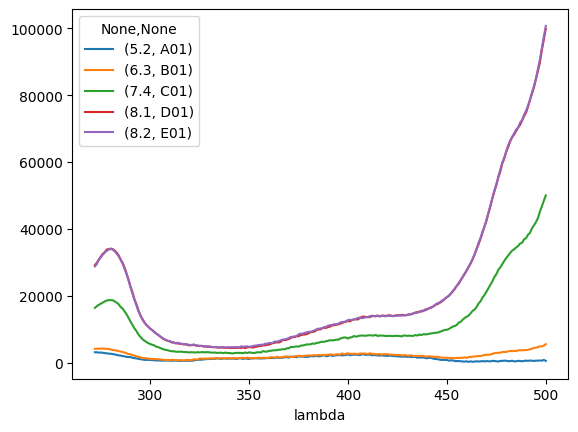

In [23]:
tit0.plot()

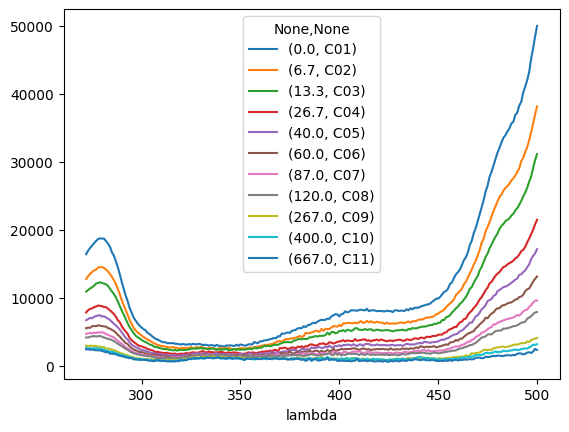

In [24]:
tit3.plot()